# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from plotnine import *

In [4]:
penguins = load_penguins()
penguins = penguins.dropna()

Frist model

In [5]:
y = penguins["bill_depth_mm"]
X = penguins.drop("bill_depth_mm", axis = 1)
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
ct = ColumnTransformer(
  [
      ("dummify", OneHotEncoder(sparse_output = False), ["species","island","sex"]),
      ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  # drop or passthrough: discard or keep
  remainder = "passthrough"
).set_output(transform = "pandas")


ct_inter = ColumnTransformer(
  [
    ("interaction1", PolynomialFeatures(interaction_only = True), ["standardize__bill_length_mm", 'dummify__species_Adelie']),
    ("interaction2", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__species_Chinstrap']),
    ("interaction3", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__species_Gentoo']),
    ("interaction4", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__island_Biscoe']),
    ("interaction5", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__island_Dream']),
    ("interaction6", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__island_Torgersen']),
    ("interaction7", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__sex_female']),
    ("interaction8", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__sex_male']),
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ct),
   ("interaction", ct_inter),
   ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['species', 'island', 'sex']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['bill_length_mm'])])),
                ('interaction',
                 ColumnTransformer(transformers=[('interaction1',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_...
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__island_Torgersen']),
                                                 ('interaction7',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__sex_female']),
                                                 ('interaction8',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__sex_male'])])),
                ('linear_regression', LinearRegression())])

In [7]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted.predict(X_train)
y_pred_lr = lr_pipeline_fitted.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df = pd.DataFrame([{'model':'bill_length_mm, species, island, sex, +8 interactions', "Flexibility":12, 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

Second model

In [8]:
ct = ColumnTransformer(
  [
      ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  # drop or passthrough: discard or keep
  remainder = "drop"
).set_output(transform = "pandas")

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['bill_length_mm'])])),
                ('linear_regression', LinearRegression())])

In [9]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted.predict(X_train)
y_pred_lr = lr_pipeline_fitted.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df2 = pd.DataFrame([{'model':'bill_length_mm', "Flexibility":1, 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

Third model

In [10]:
  ct = ColumnTransformer(
  [
      ("dummify", OneHotEncoder(sparse_output = False), ["species"]),
      ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  # drop or passthrough: discard or keep
  remainder = "passthrough"
).set_output(transform = "pandas")


ct_inter = ColumnTransformer(
  [
    ("interaction1", PolynomialFeatures(interaction_only = True), ["standardize__bill_length_mm", 'dummify__species_Adelie']),
    ("interaction2", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__species_Chinstrap']),
    ("interaction3", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__species_Gentoo']),
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ct),
   ("interaction", ct_inter),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['species']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['bill_length_mm'])])),
                ('interaction',
                 ColumnTransformer(transformers=[('interaction1',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__species_Adelie']),
                                                 ('interaction2',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__species_Chinstrap']),
                                                 ('interaction3',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__species_Gentoo'])])),
                ('linear_regression', LinearRegression())])

In [11]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted.predict(X_train)
y_pred_lr = lr_pipeline_fitted.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df3 = pd.DataFrame([{'model':'bill_length_mm, species, +3 interactions', "Flexibility":5, 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

Forth model

In [12]:
ct = ColumnTransformer(
  [
      ("dummify", OneHotEncoder(sparse_output = False), ["species","island"]),
      ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  # drop or passthrough: discard or keep
  remainder = "passthrough"
).set_output(transform = "pandas")


ct_inter = ColumnTransformer(
  [
    ("interaction1", PolynomialFeatures(interaction_only = True), ["standardize__bill_length_mm", 'dummify__species_Adelie']),
    ("interaction2", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__species_Chinstrap']),
    ("interaction3", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__species_Gentoo']),
    ("interaction4", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__island_Biscoe']),
    ("interaction5", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__island_Dream']),
    ("interaction6", PolynomialFeatures(interaction_only = True), ['standardize__bill_length_mm', 'dummify__island_Torgersen']),
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ct),
   ("interaction", ct_inter),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['species', 'island']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['bill_length_mm'])])),
                ('interaction',
                 ColumnTransformer(transformers=[('interaction1',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'd...
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__island_Biscoe']),
                                                 ('interaction5',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__island_Dream']),
                                                 ('interaction6',
                                                  PolynomialFeatures(interaction_only=True),
                                                  ['standardize__bill_length_mm',
                                                   'dummify__island_Torgersen'])])),
                ('linear_regression', LinearRegression())])

In [13]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted.predict(X_train)
y_pred_lr = lr_pipeline_fitted.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df4 = pd.DataFrame([{'model':'bill_length_mm,species,island, +6 interactions', "Flexibility":9, 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

In [14]:
df_combined = pd.concat([df2, df3, df4, df], axis=0)
df_combined

,model,Flexibility,r2_score_train,r2_score_test,MSE_train,MSE_test
0,bill_length_mm,1,0.060512,0.029354,3.455349,4.285511
0,"bill_length_mm, species, +3 interactions",5,0.757135,0.792560,0.893234,0.915871
0,"bill_length_mm,species,island, +6 interactions",9,0.764107,0.785613,0.867593,0.946543
0,"bill_length_mm, species, island, sex, +8 inter...",12,0.822836,0.851411,0.651593,0.656039


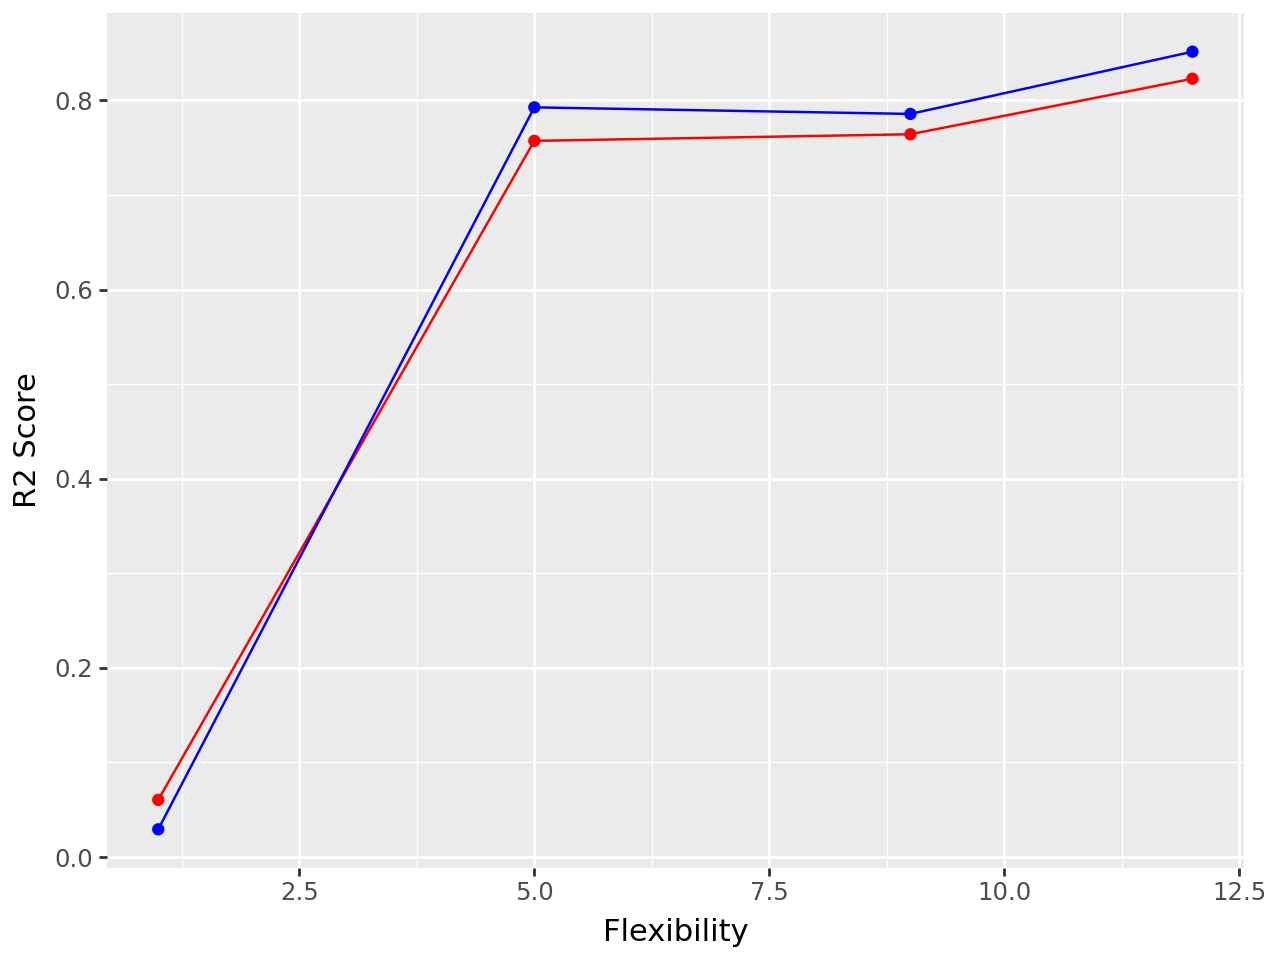

In [15]:
(ggplot(df_combined, aes(x = "Flexibility")) +
  geom_line(aes(y = "r2_score_train"),color="red") +
  geom_line(aes(y = "r2_score_test"),color="blue") +
  geom_point(aes(y = "r2_score_train"),color="red") +
  geom_point(aes(y = "r2_score_test"),color="blue") +
  labs(x = "Flexibility", y = "R2 Score", color = "Score Type")
)

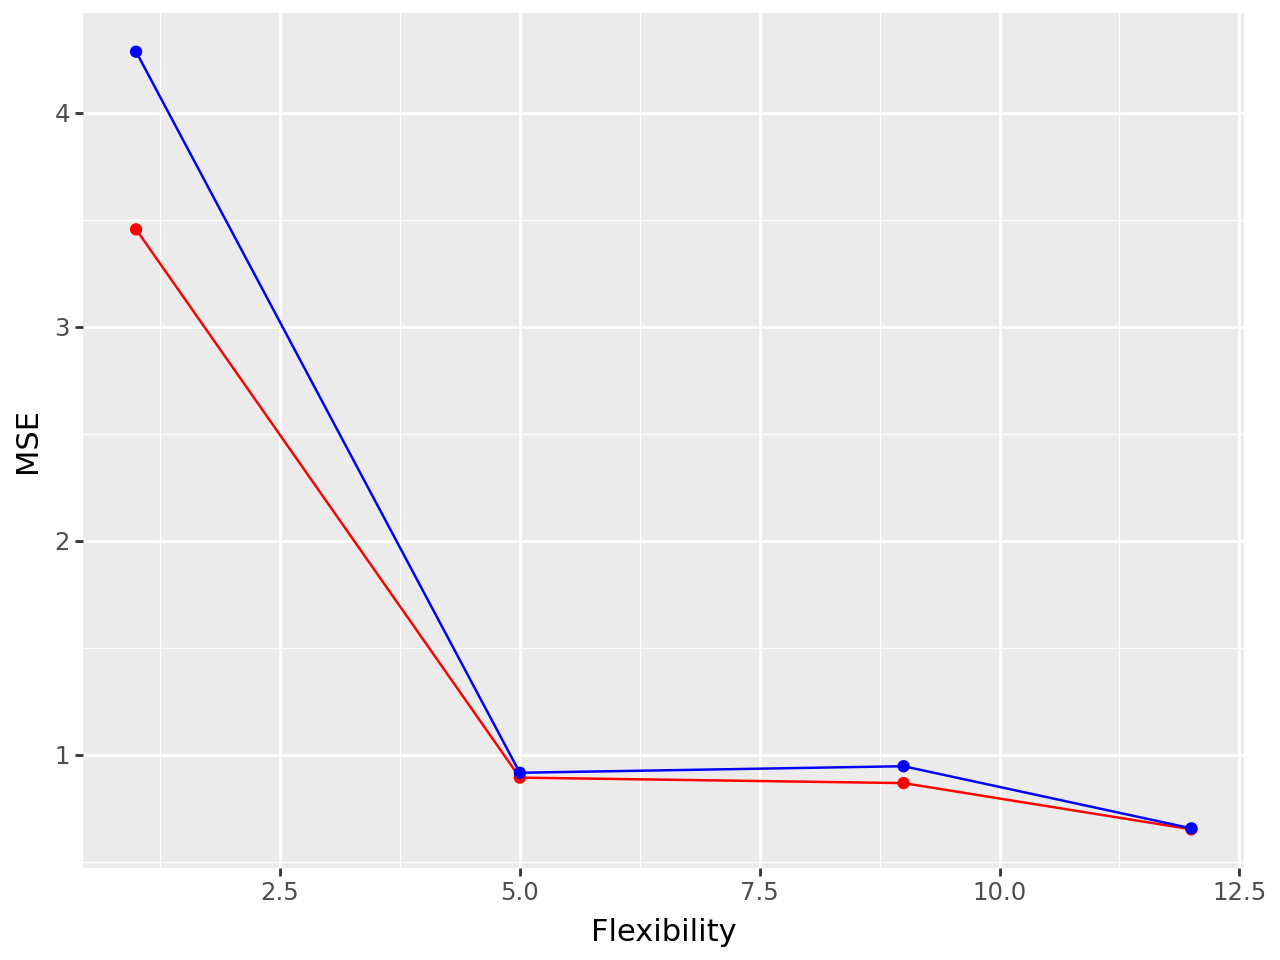

In [16]:
(ggplot(df_combined, aes(x = "Flexibility")) +
  geom_line(aes(y = "MSE_train"),color="red") +
  geom_line(aes(y = "MSE_test"),color="blue") +
  geom_point(aes(y = "MSE_train"),color="red") +
  geom_point(aes(y = "MSE_test"),color="blue") +
  labs(x = "Flexibility", y = "MSE", color = "Score Type")
)

The first model, which has 12 explanatory variables including "species," "island," and "sex" as dummy variables, standardizes "bill_length_mm," and 8 interaction terms between "bill_length_mm" and the dummy variables is the best model. It has the lowest MSE and the highest R-squared, and there is minimal difference between the test and training data performance.